<a href="https://colab.research.google.com/github/Melges-Rayssa/Codigos_GoogleColab/blob/master/Prevendo_valor_casa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prevendo o preço das casas de boston
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import sklearn
%matplotlib inline

In [3]:
#carregando o dataset
from sklearn.datasets import load_boston
boston = load_boston()

In [4]:
#verificando o tipo da variável
type(boston)

sklearn.utils.Bunch

In [5]:
#visualizando o shape do dataset (shape e para visualizar as dimensões, linhas e colunas)
boston.data.shape

(506, 13)

In [6]:
#descrição do dataset
print(boston.DESCR)


.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [7]:
#nomes dos atributos
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [24]:
# convertendo o dataset em dataframe
df = pd.DataFrame(boston.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [25]:
# convertendo o título das colunas
df.columns = boston.feature_names
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [10]:
#boston.target é uma array com o preço das casas(target e o preço das casas)
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [26]:
#adicionando o preço da casa ao dataframe
df['PRICE'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
# y = variável dependente ( preço das casas em boston)
# x = variáveis independnetes (todas as outras caracteristicas da casa)

In [27]:
# importando o módulo de regressão linear
from sklearn.linear_model import LinearRegression

In [29]:
x = df.drop('PRICE', axis=1)

In [30]:
y = df.PRICE

Text(0.5, 1.0, 'Relação entre número de quartos e preçp')

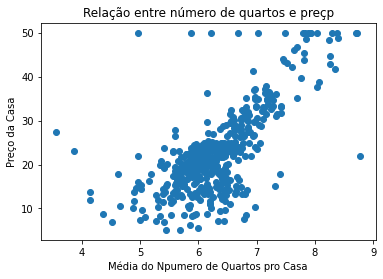

In [32]:
#criando um plot para visualizar a relação
plt.scatter(df.RM, y)
plt.xlabel("Média do Npumero de Quartos pro Casa")
plt.ylabel("Preço da Casa")
plt.title("Relação entre número de quartos e preçp")

In [33]:
# criando o objeto de regressão linear
regr = LinearRegression()

In [34]:
#tipo do objeto
type (regr)

sklearn.linear_model._base.LinearRegression

In [35]:
#treinando o modelo (função fit treina o modelo)
regr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
#coedicientes
print("Coeficiente: ", regr.intercept_)
print ("Número de Coeficientes: ", len(regr.coef_))

Coeficiente:  36.45948838508978
Número de Coeficientes:  13


In [37]:
#prevendo o preço da casa
regr.predict(x)

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423,
       25.25628446, 23.00180827, 19.53598843, 11.52363685, 18.92026211,
       18.99949651, 21.58679568, 20.90652153, 19.55290281, 19.28348205,
       19.29748321, 20.52750979, 16.91140135, 16.17801106, 18.40613603,
       12.52385753, 17.67103669, 15.83288129, 13.80628535, 15.67833832,
       13.38668561, 15.46397655, 14.70847428, 19.54737285, 20.8764282 ,
       11.45511759, 18.05923295,  8.81105736, 14.28275814, 13.70675891,
       23.81463526, 22.34193708, 23.10891142, 22.91502612, 31.35762569,
       34.21510225, 28.02056414, 25.20386628, 24.60979273, 22.94149176,
       22.09669817, 20.42320032, 18.03655088,  9.10655377, 17.20607751,
       21.28152535, 23.97222285, 27.6558508 , 24.04901809, 15.3618477 ,
       31.15264947, 24.85686978, 33.10919806, 21.77537987, 21.08493555,
       17.8725804 , 18.51110208, 23.98742856, 22.55408869, 23.37308644,
       30.36148358, 25.53056512, 21.11338564, 17.42153786, 20.78

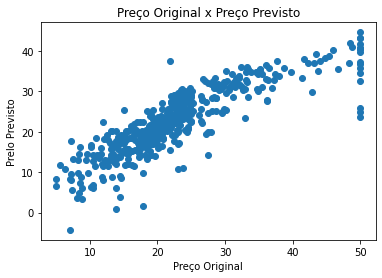

In [38]:
# comparando preços originais x preços previstos
plt.scatter(df.PRICE, regr.predict(x))
plt.xlabel("Preço Original")
plt.ylabel("Prelo Previsto")
plt.title("Preço Original x Preço Previsto")
plt.show()

In [39]:
#calculando o MSE( Mean Squared Error)
msel = np.mean((df.PRICE - regr.predict(x)) ** 2)
print(msel)

21.89483118172921


In [40]:
# aplicando regressão linear para apenas uma variável e calculando o MSE
regr = LinearRegression()
regr.fit(x[['PTRATIO']], df.PRICE)
mse2 = np.mean((df.PRICE - regr.predict (x[['PTRATIO']])) ** 2)
print(mse2)

62.65220001376923


In [42]:
# dividindo os dados em treino e de teste (opção 1)
x_treino = x[:-50]
x_teste = x[-50:]

y_treino = df.PRICE[:-50]
y_teste = df.PRICE[-50:]

print(x_treino.shape, x_teste.shape, y_treino.shape, y_teste.shape)


(456, 13) (50, 13) (456,) (50,)


In [43]:
# dividindo os dados em treino e de teste (opção 2)
from sklearn.model_selection import train_test_split

In [44]:
#dividindo x e y em dados de treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x, df.PRICE, test_size = 0.30, random_state = 5)

In [47]:
#imprimindo o shape dos datasets
print(x_treino.shape, x_teste.shape, y_treino.shape, y_teste.shape )

(354, 13) (152, 13) (354,) (152,)


In [48]:
# construindo o modelo de regressão
regr = LinearRegression()

In [49]:
# treinando o modelo
regr. fit(x_treino, y_treino)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
#definindo os dados de treino e teste
pred_treino = regr.predict(x_treino)
pred_teste = regr.predict(x_teste)

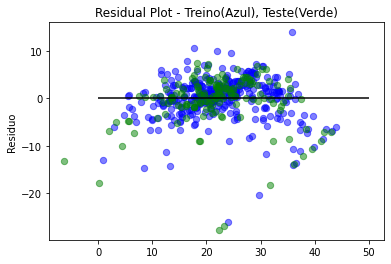

In [53]:
# comparando os preços originais x preços previstos
plt.scatter(regr.predict(x_treino),regr.predict(x_treino) - y_treino, c= 'b', s=40, alpha = 0.5)
plt.scatter(regr.predict(x_teste),regr.predict(x_teste) - y_teste, c='g', s=40, alpha = 0.5)
plt.hlines(y =0, xmin = 0, xmax = 50)
plt.ylabel("Residuo")
plt.title("Residual Plot - Treino(Azul), Teste(Verde)")
plt.show()